In [13]:
import pandas as pd
import numpy as np
import os
import pickle
from pandas.api.types import is_string_dtype, is_numeric_dtype
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

In [14]:
cwd = os.getcwd()
dataPath1 = cwd + '\\data\\train.csv'
dataPath2 = cwd + '\\data\\test.csv'
df1 = pd.read_csv(dataPath1)
df2 = pd.read_csv(dataPath2)

In [15]:
num_list = []
cat_list = []

for column in df1:
    if is_numeric_dtype(df1[column]):
        num_list.append(column)
    elif is_string_dtype(df1[column]):
        cat_list.append(column)

<AxesSubplot:>

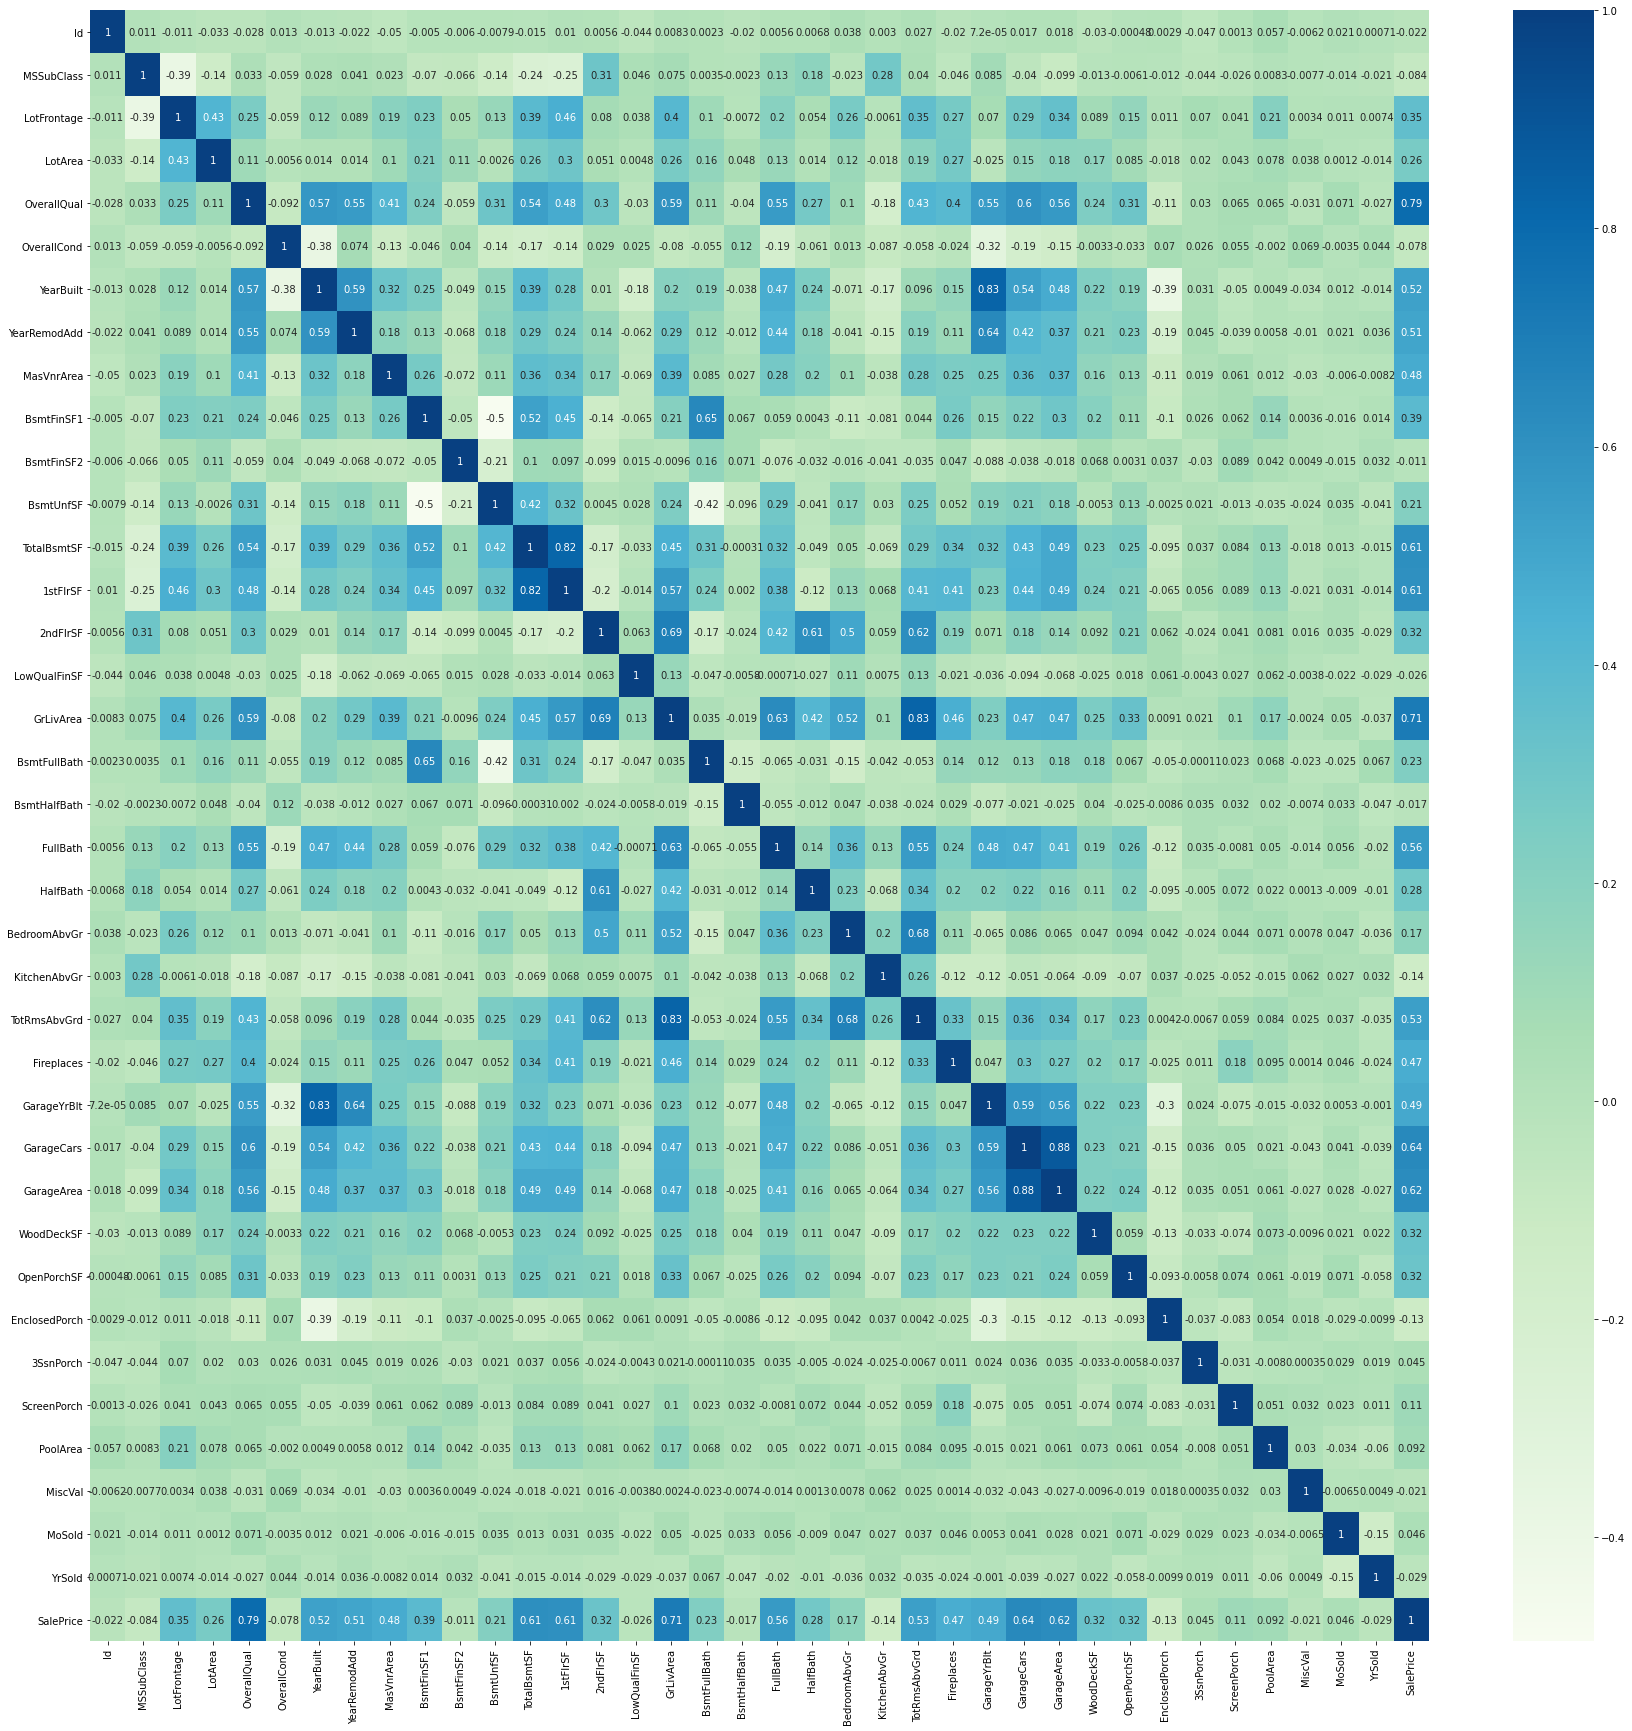

In [16]:
plt.figure(column, figsize = (30, 30))
correlation = df1.corr()
sns.heatmap(correlation, cmap = 'GnBu', annot = True)

# Create a list of features 

In [17]:
# Create list of features 
features = ['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'MoSold', 'YrSold']
#features = num_list

In [18]:
# selection of feature normalization methods: scaled, mean normalization and standard deviation
df_scaled = df1.copy()
df_scaled = df_scaled[features]
df_norm = df1.copy()
df_norm = df_norm[features]
df_std = df1.copy()
df_std = df_std[features]

for column in df_scaled[features]:
    df_scaled[column] = df_scaled[column]  / df_scaled[column].abs().max()

for column in df_norm[features]:
    df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())

for column in df_std[features]:
    df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()

df_std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1460 non-null   float64
 1   OverallQual   1460 non-null   float64
 2   OverallCond   1460 non-null   float64
 3   YearBuilt     1460 non-null   float64
 4   YearRemodAdd  1460 non-null   float64
 5   1stFlrSF      1460 non-null   float64
 6   2ndFlrSF      1460 non-null   float64
 7   LowQualFinSF  1460 non-null   float64
 8   GrLivArea     1460 non-null   float64
 9   FullBath      1460 non-null   float64
 10  BedroomAbvGr  1460 non-null   float64
 11  TotRmsAbvGrd  1460 non-null   float64
 12  Fireplaces    1460 non-null   float64
 13  MoSold        1460 non-null   float64
 14  YrSold        1460 non-null   float64
dtypes: float64(15)
memory usage: 171.2 KB


In [19]:
# select target variable
y = df1.SalePrice

# Select columns corresponding to features, and preview the data
X = df_std[features]
#X = df_scaled.iloc[:, 1:37]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1460 non-null   float64
 1   OverallQual   1460 non-null   float64
 2   OverallCond   1460 non-null   float64
 3   YearBuilt     1460 non-null   float64
 4   YearRemodAdd  1460 non-null   float64
 5   1stFlrSF      1460 non-null   float64
 6   2ndFlrSF      1460 non-null   float64
 7   LowQualFinSF  1460 non-null   float64
 8   GrLivArea     1460 non-null   float64
 9   FullBath      1460 non-null   float64
 10  BedroomAbvGr  1460 non-null   float64
 11  TotRmsAbvGrd  1460 non-null   float64
 12  Fireplaces    1460 non-null   float64
 13  MoSold        1460 non-null   float64
 14  YrSold        1460 non-null   float64
dtypes: float64(15)
memory usage: 171.2 KB


In [20]:
# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, shuffle=True, train_size=0.85, test_size=0.15, random_state=1)

In [21]:
# Create a random forest model
rf_model = RandomForestRegressor(n_estimators=30, random_state=1)
rf_model.fit(train_X, train_y)
rf_val_predictions = rf_model.predict(val_X)

In [22]:
# Validation metrics based on train / validation data split
print('MAE: {:,.2f}'.format(mean_absolute_error(val_y, rf_val_predictions)))
print('MSE: {:,.2f}'.format(mean_squared_error(val_y, rf_val_predictions)))
print('RMSE: {:,.2f}'.format(np.sqrt(mean_squared_error(val_y, rf_val_predictions))))
print('R Squared: {:,.2f}'.format(rf_model.score(val_X, val_y)))

MAE: 16,521.87
MSE: 563,354,749.15
RMSE: 23,735.10
R Squared: 0.91


In [23]:
# Access the current working directory and output the model to a pickle file
cwd = os.getcwd()
modelPath = os.path.join(cwd,'model', 'rf_housing.pkl')
with open(modelPath, 'wb') as file:
	pickle.dump(rf_model, file)

In [24]:
# Create a new Random Forest model which you will train on all training data
rf_model_on_full_data = RandomForestRegressor(n_estimators=30, random_state = 1)

# fit model on all data from the training data file
rf_model_on_full_data.fit(X, y)

RandomForestRegressor(n_estimators=30, random_state=1)

In [25]:
X_test = df2[features]
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotArea       1459 non-null   int64
 1   OverallQual   1459 non-null   int64
 2   OverallCond   1459 non-null   int64
 3   YearBuilt     1459 non-null   int64
 4   YearRemodAdd  1459 non-null   int64
 5   1stFlrSF      1459 non-null   int64
 6   2ndFlrSF      1459 non-null   int64
 7   LowQualFinSF  1459 non-null   int64
 8   GrLivArea     1459 non-null   int64
 9   FullBath      1459 non-null   int64
 10  BedroomAbvGr  1459 non-null   int64
 11  TotRmsAbvGrd  1459 non-null   int64
 12  Fireplaces    1459 non-null   int64
 13  MoSold        1459 non-null   int64
 14  YrSold        1459 non-null   int64
dtypes: int64(15)
memory usage: 171.1 KB


In [26]:
# make predictions using the test data file
rf_test_predictions = rf_model_on_full_data.predict(X_test)
print(rf_test_predictions)

[296502.7 296502.7 585875.  ... 296502.7 296502.7 585875. ]


In [27]:
# Save predictions to a file
output = pd.DataFrame({'Id': df2.Id, 'SalePrice': rf_test_predictions})
output.to_csv('data\\output.csv', index=False)